# 1.Chuẩn bị dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


# 2.Đọc tập dữ liệu

In [2]:
data = pd.read_csv('../Data/Loan_default.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [3]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
data = data.drop('LoanID', axis=1)

# 3.Xử lý dữ liệu

### 3.1.Xử lý dữ liệu trùng lặp và dữ liệu thiếu

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

### 3.2.Xử lý dữ liệu object

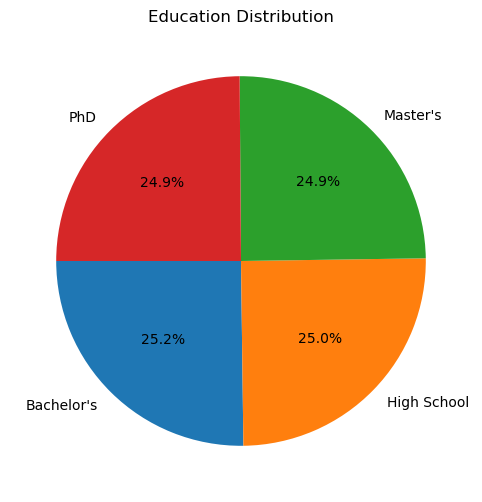

In [7]:
education_cout = data['Education'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(education_cout, labels=education_cout.index, autopct='%1.1f%%', startangle=180)
plt.title('Education Distribution')
plt.show()

In [8]:
education_map = {'PhD': 0, "Master's": 1, "Bachelor's": 2, 'High School': 3}
data['Education'] = data['Education'].map(education_map)

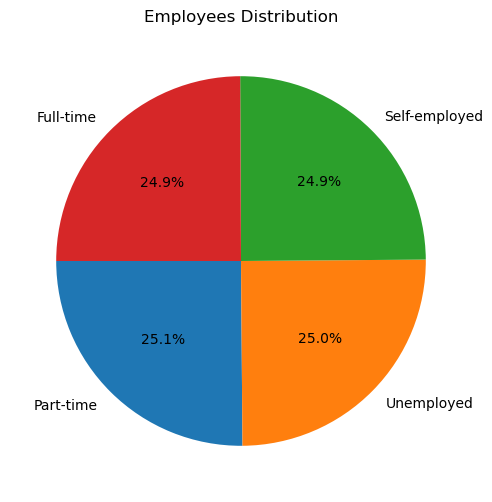

In [9]:
employees = data['EmploymentType'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(employees, labels=employees.index, autopct='%1.1f%%', startangle=180)
plt.title('Employees Distribution')
plt.show()

In [10]:
data['EmploymentType'].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [11]:
employees_map = {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3}
data['EmploymentType'] = data['EmploymentType'].map(employees_map)

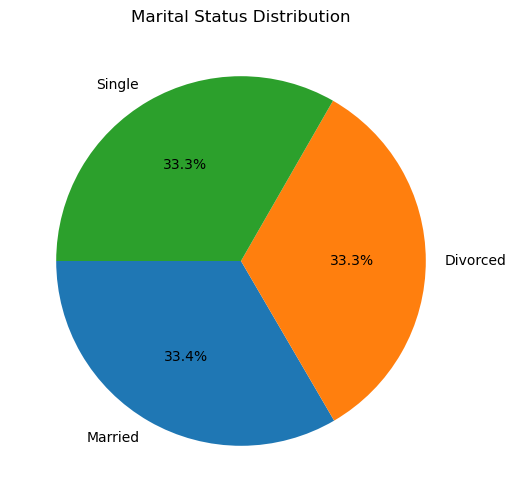

In [12]:
marital_status = data['MaritalStatus'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%', startangle=180)
plt.title('Marital Status Distribution')
plt.show()

In [13]:
MaritalStatus_map = {'Single': 0, 'Married': 1, 'Divorced': 2}
data['MaritalStatus'] = data['MaritalStatus'].map(MaritalStatus_map)

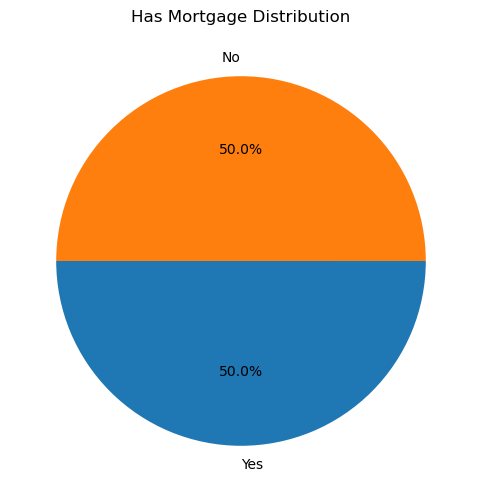

In [14]:
hasmore_count = data['HasMortgage'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(hasmore_count, labels=hasmore_count.index, autopct='%1.1f%%', startangle=180)
plt.title('Has Mortgage Distribution')
plt.show()

In [15]:
HasMortgage_map = {'No': 0, 'Yes': 1}
data['HasMortgage'] = data['HasMortgage'].map(HasMortgage_map)

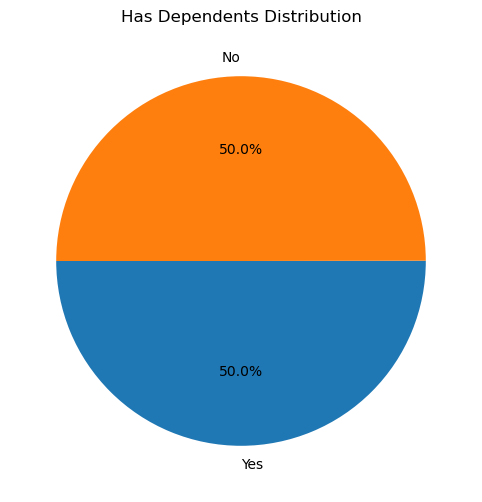

In [16]:
hasdependent_count = data['HasDependents'].value_counts()
plt.figure(figsize=(10,6))

plt.pie(hasdependent_count, labels=hasdependent_count.index, autopct='%1.1f%%', startangle=180)
plt.title('Has Dependents Distribution')
plt.show()

In [17]:
hasdependent_map = {'No': 0, 'Yes': 1}
data['HasDependents'] = data['HasDependents'].map(hasdependent_map)

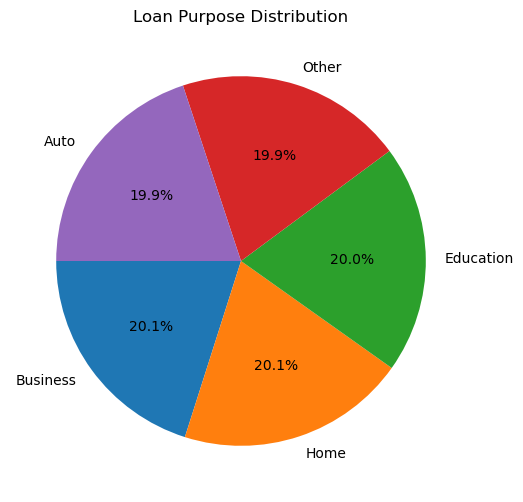

In [18]:
LoanPurpose_count = data['LoanPurpose'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(LoanPurpose_count, labels=LoanPurpose_count.index, autopct='%1.1f%%', startangle=180)
plt.title('Loan Purpose Distribution')
plt.show()

In [19]:
loanpurpose_map = {'Auto':0, 'Home':1, 'Education':2, 'Personal':3,'Business':4,'Other':5}
data['LoanPurpose'] = data['LoanPurpose'].map(loanpurpose_map)

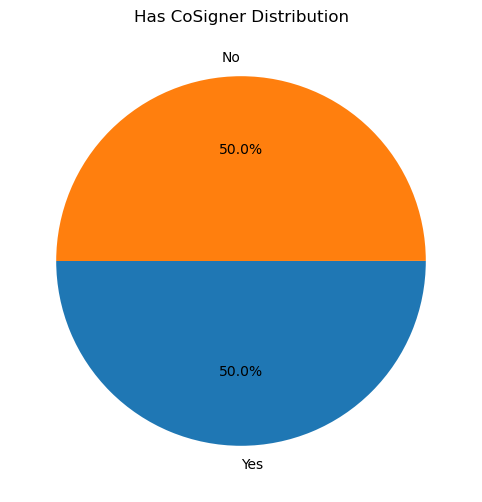

In [20]:
HasCoSigner_count = data['HasCoSigner'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(HasCoSigner_count, labels=HasCoSigner_count.index, autopct='%1.1f%%', startangle=180)
plt.title('Has CoSigner Distribution')
plt.show()

In [21]:
hascosigner_map = {'No': 0, 'Yes': 1}
data['HasCoSigner'] = data['HasCoSigner'].map(hascosigner_map)

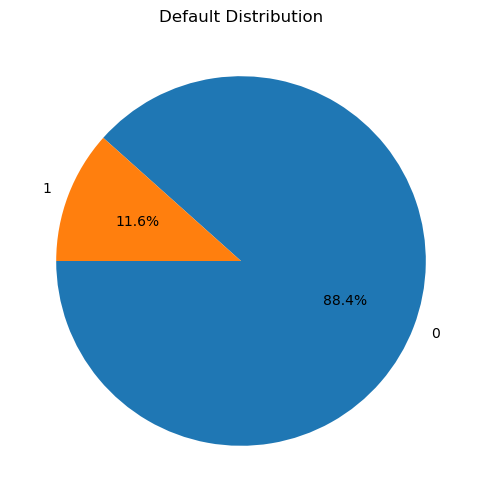

In [22]:
default_count = data['Default'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(default_count, labels=default_count.index, autopct='%1.1f%%', startangle=180)

plt.title('Default Distribution')
plt.show()

# 4.Xây dựng mô hình dự đoán


### 4.1.Huấn luyện mô hình lần 1

In [23]:
# Tách dữ liệu vào X (features) và y (target)
X = data.drop('Default', axis=1)
y = data['Default']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Khởi tạo Random Forest với trọng số lớp
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [26]:
# Dự đoán và đánh giá mô hình
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.65      0.03      0.05      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



In [27]:
# Đánh giá mô hình trên dữ liệu huấn luyện
train_score = rf_model.score(X_train, y_train)
print(f'Train accuracy: {train_score}')

# Đánh giá mô hình trên dữ liệu kiểm tra
test_score = rf_model.score(X_test, y_test)
print(f'Test accuracy: {test_score}')


Train accuracy: 0.9999706281177029
Test accuracy: 0.8859800274133542


### 4.2. Huấn luyện lại mô hình

In [28]:
# Khởi tạo Random Forest với trọng số lớp
rf_model_1 = RandomForestClassifier(class_weight='balanced',max_depth=10, random_state=42)
rf_model_1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [29]:
# Dự đoán và đánh giá mô hình
y_pred_rf_1 = rf_model_1.predict(X_test)
print(classification_report(y_test, y_pred_rf_1))



              precision    recall  f1-score   support

           0       0.94      0.75      0.83     45170
           1       0.24      0.62      0.35      5900

    accuracy                           0.73     51070
   macro avg       0.59      0.68      0.59     51070
weighted avg       0.86      0.73      0.77     51070



In [30]:
# Đánh giá mô hình trên dữ liệu huấn luyện
train_score = rf_model_1.score(X_train, y_train)
print(f'Train accuracy: {train_score}')

# Đánh giá mô hình trên dữ liệu kiểm tra
test_score = rf_model_1.score(X_test, y_test)
print(f'Test accuracy: {test_score}')

Train accuracy: 0.7474605560097319
Test accuracy: 0.7310749951047582


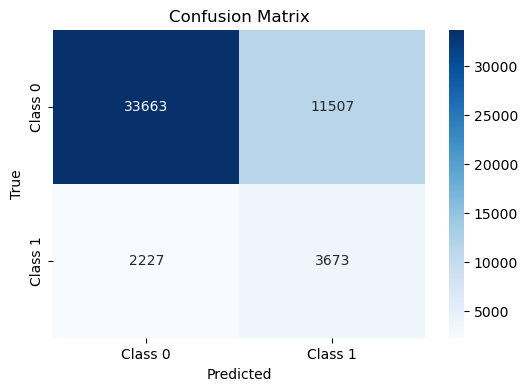

In [31]:
# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_1)

# Vẽ confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 5.Lưu mô hình

In [34]:
import joblib
joblib.dump(rf_model_1, '../models/Random.joblib')

['../models/Random.joblib']